In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [2]:
data = pd.read_csv('premall_customer.csv')

In [3]:
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre
0,1,19,15.00,39,Male
1,2,21,15.00,81,Male
2,3,20,16.00,6,Female
3,4,23,16.00,77,Female
4,5,31,17.00,40,Female
...,...,...,...,...,...
195,196,35,120.00,79,Female
196,197,45,126.00,28,Female
197,198,32,126.00,74,Male
198,199,32,132.75,18,Male


In [4]:
x = data.iloc[:, [2, 3]].values


In [5]:
db = DBSCAN(eps=5, min_samples=5).fit(x)
labels = db.labels_

In [6]:
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [7]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [8]:
n_clusters_

5

In [9]:
n_noise_ = list(labels).count(-1)
n_noise_

87

In [10]:
supervised=pd.DataFrame(data)
supervised['cluster_group']=labels
supervised

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre,cluster_group
0,1,19,15.00,39,Male,-1
1,2,21,15.00,81,Male,0
2,3,20,16.00,6,Female,-1
3,4,23,16.00,77,Female,0
4,5,31,17.00,40,Female,-1
...,...,...,...,...,...,...
195,196,35,120.00,79,Female,-1
196,197,45,126.00,28,Female,-1
197,198,32,126.00,74,Male,-1
198,199,32,132.75,18,Male,-1


In [11]:
supervised.to_csv('dbscan.csv', index=False)

C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


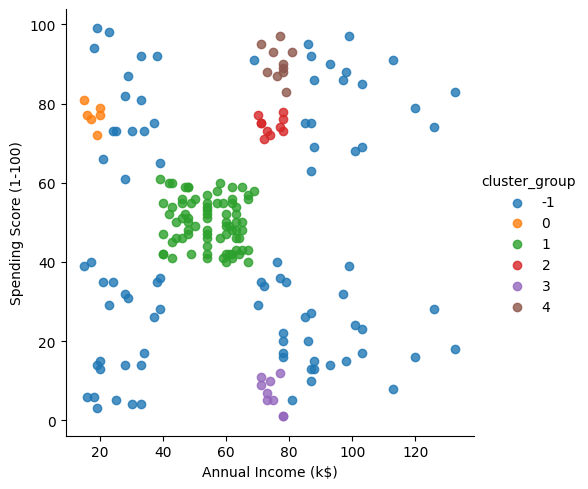

In [13]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[2], y=supervised.columns[3], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)